In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Max\Desktop\Projects\Car Price Prediction\used_cars.csv")

In [3]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [5]:
data['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [6]:
data.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [7]:
data['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Subaru            64
Acura             64
Mazda             64
Honda             63
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Genesis           20
Mitsubishi        20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
FIAT               5
Lotus              4
Lucid  

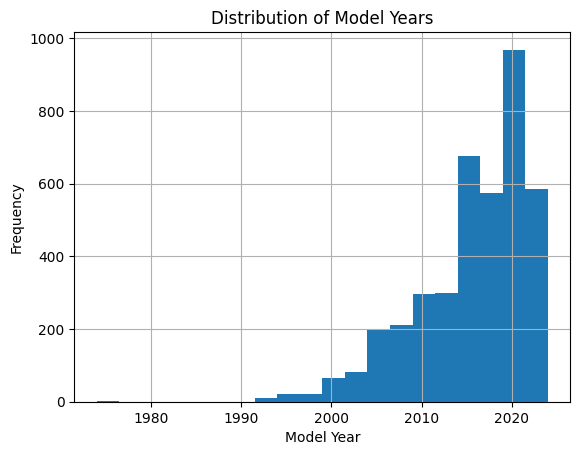

In [15]:
import matplotlib.pyplot as plt

data['model_year'].hist(bins=20)
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Distribution of Model Years')
plt.show()

In [16]:
# Remove ' mi.' suffix and convert to integer
data['milage'] = data['milage'].str.replace(' mi.', '').str.replace(',', '').astype(int)

# Display the first few rows to verify the changes
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,country
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",US
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",Korea
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598",Japan
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",Japan
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999",Germany


In [17]:
data['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

**Feature Engineering**

brand country

In [14]:
# Dictionary mapping brands to their respective countries
brand_country = {
    'Ford': 'US', 'Chevrolet': 'US', 'Tesla': 'US', 'Dodge': 'US', 'Jeep': 'US',
    'Hyundai': 'Korea', 'Kia': 'Korea', 'Genesis': 'Korea', 'Lincoln': 'US',
    'Toyota': 'Japan', 'Honda': 'Japan', 'Nissan': 'Japan', 'Mazda': 'Japan', 'Subaru': 'Japan', 'Lexus': 'Japan', 'Mitsubishi': 'Japan', 'INFINITI': 'Japan', 'Acura': 'Japan',
    'BMW': 'Germany', 'Mercedes-Benz': 'Germany', 'Audi': 'Germany', 'Volkswagen': 'Germany', 'Porsche': 'Germany', 'Opel': 'Germany',
    'Jaguar': 'UK', 'Land Rover': 'UK', 'Bentley': 'UK', 'Mini': 'UK', 'Rolls-Royce': 'UK',
    'Volvo': 'Sweden', 'Saab': 'Sweden',
    'Fiat': 'Italy', 'Alfa Romeo': 'Italy', 'Ferrari': 'Italy', 'Lamborghini': 'Italy', 'Maserati': 'Italy',
    'Peugeot': 'France', 'Renault': 'France', 'Citroen': 'France',
    'Aston Martin': 'UK', 'McLaren': 'UK', 'Land': 'UK', 'Lotus': 'UK'
}

# Add a new column 'country' to the dataframe
data['country'] = data['brand'].map(brand_country)

# Display the first few rows of the updated dataframe
data.tail(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,country
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950",UK
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900",Germany
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998",Germany
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999",US
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000",Germany


model year buckets